In [3]:
import pandas as pd

sona = pd.read_csv("./datasets/sonar.csv", header=None)
sona.head(3)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R


In [4]:
sona.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

In [5]:
sona.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [8]:
sona[60].value_counts()

M    111
R     97
Name: 60, dtype: int64

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

import numpy as np
import tensorflow as tf

np.random.seed(3)
tf.random.set_seed(3)

data = sona.values

x = data[:, 0:60]
x = np.asarray(x).astype(np.float32)
y = sona[60]

y_en = encoder.fit_transform(y)

model = Sequential()
model.add(Dense(24,input_dim = 60, activation = "relu"))
model.add(Dense(10, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(loss = "binary_crossentropy",
             optimizer = "adam",
             metrics = ["accuracy"])

history= model.fit(x, y_en, epochs=200, batch_size=5)

print("/n Accracy: %.4f" % (model.evaluate(x,y_en)[1]))




Epoch 1/200
42/42 [==============================] - 2s 5ms/step - loss: 0.6514 - accuracy: 0.6923
Epoch 2/200
42/42 [==============================] - 0s 4ms/step - loss: 0.6169 - accuracy: 0.7163
Epoch 3/200
42/42 [==============================] - 0s 4ms/step - loss: 0.6004 - accuracy: 0.7067
Epoch 4/200
42/42 [==============================] - 0s 4ms/step - loss: 0.5723 - accuracy: 0.7596
Epoch 5/200
42/42 [==============================] - 0s 4ms/step - loss: 0.5476 - accuracy: 0.7788
Epoch 6/200
42/42 [==============================] - 0s 4ms/step - loss: 0.5347 - accuracy: 0.7740
Epoch 7/200
42/42 [==============================] - 0s 4ms/step - loss: 0.5092 - accuracy: 0.7885
Epoch 8/200
42/42 [==============================] - 0s 4ms/step - loss: 0.4876 - accuracy: 0.7837
Epoch 9/200
42/42 [==============================] - 0s 4ms/step - loss: 0.4780 - accuracy: 0.8029
Epoch 10/200
42/42 [==============================] - 0s 4ms/step - loss: 0.4578 - accuracy: 0.7788
Epoch 11/

42/42 [==============================] - 0s 4ms/step - loss: 0.1504 - accuracy: 0.9423
Epoch 84/200
42/42 [==============================] - 0s 4ms/step - loss: 0.1590 - accuracy: 0.9327
Epoch 85/200
42/42 [==============================] - 0s 4ms/step - loss: 0.1497 - accuracy: 0.9615
Epoch 86/200
42/42 [==============================] - 0s 4ms/step - loss: 0.1499 - accuracy: 0.9423
Epoch 87/200
42/42 [==============================] - 0s 4ms/step - loss: 0.1411 - accuracy: 0.9615
Epoch 88/200
42/42 [==============================] - 0s 4ms/step - loss: 0.1870 - accuracy: 0.9375
Epoch 89/200
42/42 [==============================] - 0s 4ms/step - loss: 0.1376 - accuracy: 0.9615
Epoch 90/200
42/42 [==============================] - 0s 4ms/step - loss: 0.1400 - accuracy: 0.9712
Epoch 91/200
42/42 [==============================] - 0s 4ms/step - loss: 0.1418 - accuracy: 0.9615
Epoch 92/200
42/42 [==============================] - 0s 4ms/step - loss: 0.1417 - accuracy: 0.9423
Epoch 93/200


42/42 [==============================] - 0s 4ms/step - loss: 0.0257 - accuracy: 1.0000
Epoch 165/200
42/42 [==============================] - 0s 4ms/step - loss: 0.0215 - accuracy: 1.0000
Epoch 166/200
42/42 [==============================] - 0s 4ms/step - loss: 0.0219 - accuracy: 1.0000
Epoch 167/200
42/42 [==============================] - 0s 5ms/step - loss: 0.0199 - accuracy: 1.0000
Epoch 168/200
42/42 [==============================] - 0s 4ms/step - loss: 0.0277 - accuracy: 1.0000
Epoch 169/200
42/42 [==============================] - 0s 4ms/step - loss: 0.0223 - accuracy: 1.0000
Epoch 170/200
42/42 [==============================] - 0s 4ms/step - loss: 0.0179 - accuracy: 1.0000
Epoch 171/200
42/42 [==============================] - 0s 4ms/step - loss: 0.0196 - accuracy: 1.0000
Epoch 172/200
42/42 [==============================] - 0s 4ms/step - loss: 0.0176 - accuracy: 1.0000
Epoch 173/200
42/42 [==============================] - 0s 4ms/step - loss: 0.0179 - accuracy: 1.0000
Epoc

In [16]:
hist = history.history

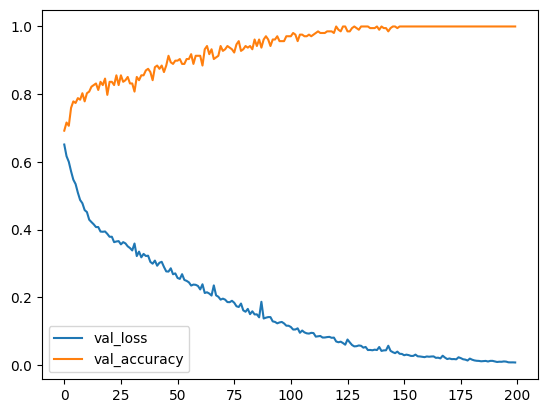

In [21]:
import matplotlib.pyplot as plt

vl = hist["loss"]
va = hist["accuracy"]

plt.plot(vl, label = "loss")
plt.plot(va, label = "accuracy")
plt.legend()
plt.show()

In [26]:
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

import numpy as np
import tensorflow as tf

np.random.seed(3)
tf.random.set_seed(3)

data = sona.values

x = data[:, 0:60]
x = np.asarray(x).astype(np.float32)
y = sona[60]

y_en = encoder.fit_transform(y)

model = Sequential()
model.add(Dense(24,input_dim = 60, activation = "relu"))
model.add(Dense(10, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(loss = "binary_crossentropy",
             optimizer = "adam",
             metrics = ["accuracy"])





history_1 = model.fit(x, y_en, validation_split= 0.3,epochs=200, batch_size=5)

print("/n Accracy: %.4f" % (model.evaluate(x,y_en)[1]))


Epoch 1/200
29/29 [==============================] - 2s 24ms/step - loss: 0.7044 - accuracy: 0.3724 - val_loss: 0.7074 - val_accuracy: 0.0952
Epoch 2/200
29/29 [==============================] - 0s 8ms/step - loss: 0.6800 - accuracy: 0.6690 - val_loss: 0.7543 - val_accuracy: 0.0000e+00
Epoch 3/200
29/29 [==============================] - 0s 8ms/step - loss: 0.6625 - accuracy: 0.6690 - val_loss: 0.8167 - val_accuracy: 0.0000e+00
Epoch 4/200
29/29 [==============================] - 0s 8ms/step - loss: 0.6466 - accuracy: 0.6690 - val_loss: 0.8854 - val_accuracy: 0.0000e+00
Epoch 5/200
29/29 [==============================] - 0s 8ms/step - loss: 0.6268 - accuracy: 0.6690 - val_loss: 1.0069 - val_accuracy: 0.0000e+00
Epoch 6/200
29/29 [==============================] - 0s 7ms/step - loss: 0.6093 - accuracy: 0.6690 - val_loss: 1.0560 - val_accuracy: 0.0000e+00
Epoch 7/200
29/29 [==============================] - 0s 8ms/step - loss: 0.5899 - accuracy: 0.6828 - val_loss: 1.0983 - val_accuracy:

29/29 [==============================] - 0s 8ms/step - loss: 0.1824 - accuracy: 0.9448 - val_loss: 2.4839 - val_accuracy: 0.3016
Epoch 59/200
29/29 [==============================] - 0s 8ms/step - loss: 0.1737 - accuracy: 0.9517 - val_loss: 2.3093 - val_accuracy: 0.3175
Epoch 60/200
29/29 [==============================] - 0s 8ms/step - loss: 0.1615 - accuracy: 0.9586 - val_loss: 2.1442 - val_accuracy: 0.3651
Epoch 61/200
29/29 [==============================] - 0s 7ms/step - loss: 0.1605 - accuracy: 0.9586 - val_loss: 2.2916 - val_accuracy: 0.3651
Epoch 62/200
29/29 [==============================] - 0s 6ms/step - loss: 0.1547 - accuracy: 0.9586 - val_loss: 2.2864 - val_accuracy: 0.3492
Epoch 63/200
29/29 [==============================] - 0s 8ms/step - loss: 0.1565 - accuracy: 0.9586 - val_loss: 2.3247 - val_accuracy: 0.3651
Epoch 64/200
29/29 [==============================] - 0s 9ms/step - loss: 0.1463 - accuracy: 0.9655 - val_loss: 2.5066 - val_accuracy: 0.3333
Epoch 65/200
29/29 

Epoch 116/200
29/29 [==============================] - 0s 6ms/step - loss: 0.0498 - accuracy: 0.9931 - val_loss: 3.2486 - val_accuracy: 0.3492
Epoch 117/200
29/29 [==============================] - 0s 8ms/step - loss: 0.0486 - accuracy: 0.9931 - val_loss: 3.3747 - val_accuracy: 0.3333
Epoch 118/200
29/29 [==============================] - 0s 8ms/step - loss: 0.0480 - accuracy: 0.9931 - val_loss: 3.1105 - val_accuracy: 0.3651
Epoch 119/200
29/29 [==============================] - 0s 9ms/step - loss: 0.0470 - accuracy: 0.9931 - val_loss: 3.5083 - val_accuracy: 0.3333
Epoch 120/200
29/29 [==============================] - 0s 7ms/step - loss: 0.0447 - accuracy: 0.9931 - val_loss: 3.6538 - val_accuracy: 0.3333
Epoch 121/200
29/29 [==============================] - 0s 7ms/step - loss: 0.0461 - accuracy: 0.9862 - val_loss: 3.0916 - val_accuracy: 0.3651
Epoch 122/200
29/29 [==============================] - 0s 8ms/step - loss: 0.0454 - accuracy: 0.9931 - val_loss: 3.2942 - val_accuracy: 0.3492

29/29 [==============================] - 0s 8ms/step - loss: 0.0152 - accuracy: 0.9931 - val_loss: 4.5743 - val_accuracy: 0.3492
Epoch 174/200
29/29 [==============================] - 0s 8ms/step - loss: 0.0152 - accuracy: 0.9931 - val_loss: 4.7930 - val_accuracy: 0.3333
Epoch 175/200
29/29 [==============================] - 0s 8ms/step - loss: 0.0148 - accuracy: 0.9931 - val_loss: 4.6426 - val_accuracy: 0.3492
Epoch 176/200
29/29 [==============================] - 0s 8ms/step - loss: 0.0156 - accuracy: 0.9931 - val_loss: 4.1983 - val_accuracy: 0.3651
Epoch 177/200
29/29 [==============================] - 0s 7ms/step - loss: 0.0147 - accuracy: 0.9931 - val_loss: 4.9340 - val_accuracy: 0.3333
Epoch 178/200
29/29 [==============================] - 0s 9ms/step - loss: 0.0135 - accuracy: 0.9931 - val_loss: 4.8793 - val_accuracy: 0.3333
Epoch 179/200
29/29 [==============================] - 0s 9ms/step - loss: 0.0127 - accuracy: 1.0000 - val_loss: 4.6503 - val_accuracy: 0.3492
Epoch 180/200

In [27]:
hist = history_1.history

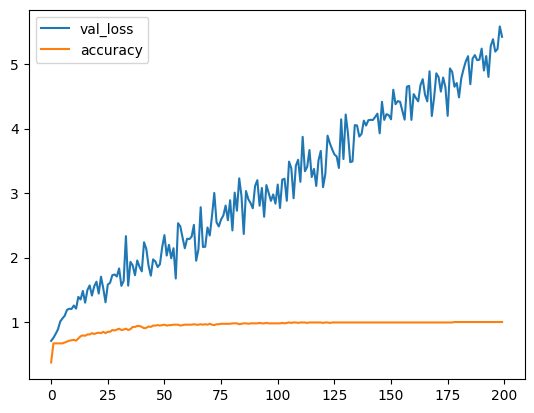

In [31]:
import matplotlib.pyplot as plt

vl = hist["val_loss"]
va = hist["accuracy"]

plt.plot(vl, label = "val_loss")
plt.plot(va, label = "accuracy")
plt.legend()
plt.show()

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

import numpy as np
import tensorflow as tf

np.random.seed(3)
tf.random.set_seed(3)

data = sona.values

x = data[:, 0:60]
x = np.asarray(x).astype(np.float32)
y = sona[60]

y_en = encoder.fit_transform(y)

model = Sequential()
model.add(Dense(12,input_dim = 60, activation = "relu"))
model.add(Dense(10, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(loss = "binary_crossentropy",
             optimizer = "adam",
             metrics = ["accuracy"])

history_2= model.fit(x, y_en, epochs=200, batch_size=5)

print("/n Accracy: %.4f" % (model.evaluate(x,y_en)[1]))


Epoch 1/200
42/42 [==============================] - 2s 4ms/step - loss: 0.6820 - accuracy: 0.5817
Epoch 2/200
42/42 [==============================] - 0s 4ms/step - loss: 0.6615 - accuracy: 0.6683
Epoch 3/200
42/42 [==============================] - 0s 4ms/step - loss: 0.6432 - accuracy: 0.6683
Epoch 4/200
42/42 [==============================] - 0s 4ms/step - loss: 0.6185 - accuracy: 0.7356
Epoch 5/200
42/42 [==============================] - 0s 4ms/step - loss: 0.5747 - accuracy: 0.7644
Epoch 6/200
42/42 [==============================] - 0s 4ms/step - loss: 0.5483 - accuracy: 0.7740
Epoch 7/200
42/42 [==============================] - 0s 4ms/step - loss: 0.5177 - accuracy: 0.7644
Epoch 8/200
42/42 [==============================] - 0s 4ms/step - loss: 0.4922 - accuracy: 0.7692
Epoch 9/200
42/42 [==============================] - 0s 4ms/step - loss: 0.4820 - accuracy: 0.7788
Epoch 10/200
42/42 [==============================] - 0s 4ms/step - loss: 0.4625 - accuracy: 0.7885
Epoch 11/

42/42 [==============================] - 0s 4ms/step - loss: 0.1430 - accuracy: 0.9712
Epoch 84/200
42/42 [==============================] - 0s 4ms/step - loss: 0.1516 - accuracy: 0.9279
Epoch 85/200
42/42 [==============================] - 0s 4ms/step - loss: 0.1387 - accuracy: 0.9519
Epoch 86/200
42/42 [==============================] - 0s 4ms/step - loss: 0.1450 - accuracy: 0.9519
Epoch 87/200
42/42 [==============================] - 0s 4ms/step - loss: 0.1322 - accuracy: 0.9663
Epoch 88/200
42/42 [==============================] - 0s 4ms/step - loss: 0.1787 - accuracy: 0.9279
Epoch 89/200
42/42 [==============================] - 0s 4ms/step - loss: 0.1347 - accuracy: 0.9663
Epoch 90/200
42/42 [==============================] - 0s 4ms/step - loss: 0.1286 - accuracy: 0.9567
Epoch 91/200
42/42 [==============================] - 0s 4ms/step - loss: 0.1266 - accuracy: 0.9663
Epoch 92/200
42/42 [==============================] - 0s 3ms/step - loss: 0.1335 - accuracy: 0.9423
Epoch 93/200


42/42 [==============================] - 0s 4ms/step - loss: 0.0260 - accuracy: 1.0000
Epoch 165/200
42/42 [==============================] - 0s 4ms/step - loss: 0.0219 - accuracy: 1.0000
Epoch 166/200
42/42 [==============================] - 0s 4ms/step - loss: 0.0229 - accuracy: 1.0000
Epoch 167/200
42/42 [==============================] - 0s 4ms/step - loss: 0.0190 - accuracy: 1.0000
Epoch 168/200
42/42 [==============================] - 0s 5ms/step - loss: 0.0278 - accuracy: 0.9952
Epoch 169/200
42/42 [==============================] - 0s 5ms/step - loss: 0.0212 - accuracy: 1.0000
Epoch 170/200
42/42 [==============================] - 0s 4ms/step - loss: 0.0198 - accuracy: 1.0000
Epoch 171/200
42/42 [==============================] - 0s 4ms/step - loss: 0.0231 - accuracy: 0.9952
Epoch 172/200
42/42 [==============================] - 0s 5ms/step - loss: 0.0183 - accuracy: 0.9952
Epoch 173/200
42/42 [==============================] - 0s 5ms/step - loss: 0.0208 - accuracy: 1.0000
Epoc

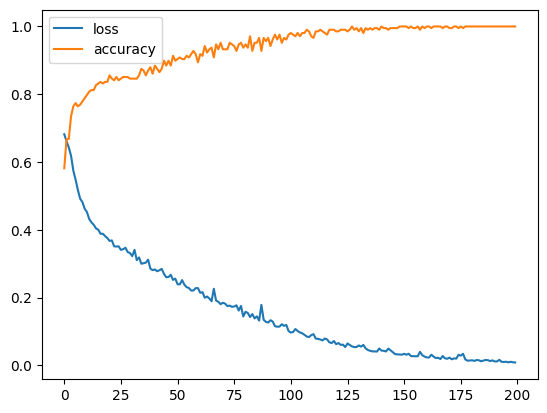

In [35]:
hist = history_2.history

vl = hist["loss"]
va = hist["accuracy"]

plt.plot(vl, label = "loss")
plt.plot(va, label = "accuracy")
plt.legend()
plt.show()

In [36]:
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

encoder = LabelEncoder()

import numpy as np
import tensorflow as tf

np.random.seed(3)
tf.random.set_seed(3)

data = sona.values

x = data[:, 0:60]
x = np.asarray(x).astype(np.float32)
y = sona[60]

y_en = encoder.fit_transform(y)


x_train,x_test, y_train, y_test = train_test_split(x,y_en, test_size=0.2, random_state=156)

model = Sequential()
model.add(Dense(12,input_dim = 60, activation = "relu"))
model.add(Dense(10, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(loss = "binary_crossentropy",
             optimizer = "adam",
             metrics = ["accuracy"])





history_1 = model.fit(x_train, y_train, validation_split= 0.3,epochs=200, batch_size=5)

print("/n Accracy: %.4f" % (model.evaluate(x_test,y_test)[1]))


Epoch 1/200
24/24 [==============================] - 3s 29ms/step - loss: 0.6900 - accuracy: 0.5517 - val_loss: 0.6982 - val_accuracy: 0.4600
Epoch 2/200
24/24 [==============================] - 0s 9ms/step - loss: 0.6795 - accuracy: 0.5517 - val_loss: 0.6778 - val_accuracy: 0.4600
Epoch 3/200
24/24 [==============================] - 0s 8ms/step - loss: 0.6686 - accuracy: 0.5517 - val_loss: 0.6685 - val_accuracy: 0.4800
Epoch 4/200
24/24 [==============================] - 0s 9ms/step - loss: 0.6518 - accuracy: 0.5517 - val_loss: 0.6562 - val_accuracy: 0.5200
Epoch 5/200
24/24 [==============================] - 0s 8ms/step - loss: 0.6445 - accuracy: 0.6293 - val_loss: 0.6382 - val_accuracy: 0.6400
Epoch 6/200
24/24 [==============================] - 0s 8ms/step - loss: 0.6314 - accuracy: 0.5948 - val_loss: 0.6398 - val_accuracy: 0.5600
Epoch 7/200
24/24 [==============================] - 0s 9ms/step - loss: 0.6282 - accuracy: 0.7069 - val_loss: 0.6165 - val_accuracy: 0.7400
Epoch 8/200


Epoch 59/200
24/24 [==============================] - 0s 8ms/step - loss: 0.2813 - accuracy: 0.8707 - val_loss: 0.4811 - val_accuracy: 0.8600
Epoch 60/200
24/24 [==============================] - 0s 9ms/step - loss: 0.2845 - accuracy: 0.8793 - val_loss: 0.4744 - val_accuracy: 0.8400
Epoch 61/200
24/24 [==============================] - 0s 9ms/step - loss: 0.2795 - accuracy: 0.8879 - val_loss: 0.5202 - val_accuracy: 0.8400
Epoch 62/200
24/24 [==============================] - 0s 6ms/step - loss: 0.2869 - accuracy: 0.8621 - val_loss: 0.5022 - val_accuracy: 0.8400
Epoch 63/200
24/24 [==============================] - 0s 6ms/step - loss: 0.2787 - accuracy: 0.8793 - val_loss: 0.5096 - val_accuracy: 0.8400
Epoch 64/200
24/24 [==============================] - 0s 9ms/step - loss: 0.2844 - accuracy: 0.8707 - val_loss: 0.4993 - val_accuracy: 0.8400
Epoch 65/200
24/24 [==============================] - 0s 8ms/step - loss: 0.3000 - accuracy: 0.8793 - val_loss: 0.4516 - val_accuracy: 0.8400
Epoch 

24/24 [==============================] - 0s 8ms/step - loss: 0.1784 - accuracy: 0.9310 - val_loss: 0.5398 - val_accuracy: 0.8400
Epoch 117/200
24/24 [==============================] - 0s 9ms/step - loss: 0.1872 - accuracy: 0.9397 - val_loss: 0.6148 - val_accuracy: 0.8400
Epoch 118/200
24/24 [==============================] - 0s 8ms/step - loss: 0.1750 - accuracy: 0.9310 - val_loss: 0.5662 - val_accuracy: 0.8400
Epoch 119/200
24/24 [==============================] - 0s 9ms/step - loss: 0.1870 - accuracy: 0.9397 - val_loss: 0.6900 - val_accuracy: 0.8000
Epoch 120/200
24/24 [==============================] - 0s 8ms/step - loss: 0.1691 - accuracy: 0.9397 - val_loss: 0.5433 - val_accuracy: 0.8200
Epoch 121/200
24/24 [==============================] - 0s 8ms/step - loss: 0.1709 - accuracy: 0.9310 - val_loss: 0.5909 - val_accuracy: 0.8400
Epoch 122/200
24/24 [==============================] - 0s 8ms/step - loss: 0.1715 - accuracy: 0.9483 - val_loss: 0.5546 - val_accuracy: 0.8000
Epoch 123/200

24/24 [==============================] - 0s 8ms/step - loss: 0.0996 - accuracy: 0.9741 - val_loss: 0.5916 - val_accuracy: 0.8400
Epoch 174/200
24/24 [==============================] - 0s 8ms/step - loss: 0.0958 - accuracy: 0.9828 - val_loss: 0.6535 - val_accuracy: 0.8400
Epoch 175/200
24/24 [==============================] - 0s 8ms/step - loss: 0.1048 - accuracy: 0.9741 - val_loss: 0.6379 - val_accuracy: 0.8400
Epoch 176/200
24/24 [==============================] - 0s 9ms/step - loss: 0.0985 - accuracy: 0.9655 - val_loss: 0.6363 - val_accuracy: 0.8400
Epoch 177/200
24/24 [==============================] - 0s 8ms/step - loss: 0.1050 - accuracy: 0.9569 - val_loss: 0.5809 - val_accuracy: 0.8200
Epoch 178/200
24/24 [==============================] - 0s 8ms/step - loss: 0.1072 - accuracy: 0.9741 - val_loss: 0.6195 - val_accuracy: 0.8400
Epoch 179/200
24/24 [==============================] - 0s 9ms/step - loss: 0.0980 - accuracy: 0.9569 - val_loss: 0.6775 - val_accuracy: 0.8200
Epoch 180/200

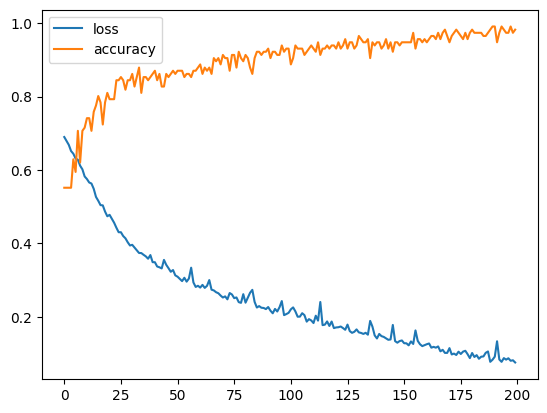

In [37]:
hist = history_1.history

vl = hist["loss"]
va = hist["accuracy"]

plt.plot(vl, label = "loss")
plt.plot(va, label = "accuracy")
plt.legend()
plt.show()

In [40]:
model.fit(x_train, y_train, epochs=130, batch_size=5)
model.save("model.h5")

Epoch 1/130
34/34 [==============================] - 0s 2ms/step - loss: 0.2342 - accuracy: 0.9337
Epoch 2/130
34/34 [==============================] - 0s 2ms/step - loss: 0.2172 - accuracy: 0.9217
Epoch 3/130
34/34 [==============================] - 0s 3ms/step - loss: 0.2041 - accuracy: 0.9458
Epoch 4/130
34/34 [==============================] - 0s 2ms/step - loss: 0.2185 - accuracy: 0.9157
Epoch 5/130
34/34 [==============================] - 0s 3ms/step - loss: 0.2058 - accuracy: 0.9398
Epoch 6/130
34/34 [==============================] - 0s 2ms/step - loss: 0.1803 - accuracy: 0.9639
Epoch 7/130
34/34 [==============================] - 0s 2ms/step - loss: 0.1957 - accuracy: 0.9217
Epoch 8/130
34/34 [==============================] - 0s 2ms/step - loss: 0.2186 - accuracy: 0.9277
Epoch 9/130
34/34 [==============================] - 0s 3ms/step - loss: 0.1669 - accuracy: 0.9458
Epoch 10/130
34/34 [==============================] - 0s 2ms/step - loss: 0.1667 - accuracy: 0.9518
Epoch 11/

34/34 [==============================] - 0s 2ms/step - loss: 0.0460 - accuracy: 0.9940
Epoch 84/130
34/34 [==============================] - 0s 2ms/step - loss: 0.0511 - accuracy: 1.0000
Epoch 85/130
34/34 [==============================] - 0s 2ms/step - loss: 0.0410 - accuracy: 1.0000
Epoch 86/130
34/34 [==============================] - 0s 2ms/step - loss: 0.0449 - accuracy: 0.9940
Epoch 87/130
34/34 [==============================] - 0s 2ms/step - loss: 0.0416 - accuracy: 1.0000
Epoch 88/130
34/34 [==============================] - 0s 2ms/step - loss: 0.0398 - accuracy: 0.9940
Epoch 89/130
34/34 [==============================] - 0s 2ms/step - loss: 0.0371 - accuracy: 1.0000
Epoch 90/130
34/34 [==============================] - 0s 2ms/step - loss: 0.0359 - accuracy: 1.0000
Epoch 91/130
34/34 [==============================] - 0s 3ms/step - loss: 0.0362 - accuracy: 1.0000
Epoch 92/130
34/34 [==============================] - 0s 3ms/step - loss: 0.0382 - accuracy: 1.0000
Epoch 93/130
